In [1]:
from devSciPyFST import fst, fstUtils
import graphviz
from IPython.display import display, Markdown

| Input \ State | p | q | r |
|:---:|:---:|:---:|:---:|
| a | p | q, p | r |
| b | q | r | - |
| c | r | - | p |
| ε | - | p | q |


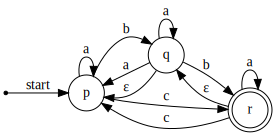

In [2]:
initState_01 = 'p'
# transitionFunction [ [State, inAlphabet, nextState], ...]
transitionFunction_01 = [ \
    ['p','a','p'], ['p','b','q'], ['p','c','r'], \
    ['q','a','q'], ['q','a','p'], ['q','b','r'], ['q','c',None], ['q',None,'p'], \
    ['r','a','r'], ['r','b',None], ['r','c','p'], ['r',None,'q'], \
]
finalStates_01 = ['r',]

fsm_01 = fst( initState = initState_01,
        transitionFunction = transitionFunction_01,
        finalStates = finalStates_01,
    )
display(Markdown(fstUtils.toMdTable(fsm_01)))
# graphviz.Source(fsm.toDot())
graphviz.Source(fstUtils.toDot(fsm_01))

| Input \ State | ('p',) | ('p', 'q') | ('p', 'q', 'r') |
|:---:|:---:|:---:|:---:|
| a | ('p',) | ('p', 'q') | ('p', 'q', 'r') |
| b | ('p', 'q') | ('p', 'q', 'r') | ('p', 'q', 'r') |
| c | ('p', 'q', 'r') | ('p', 'q', 'r') | ('p', 'q', 'r') |


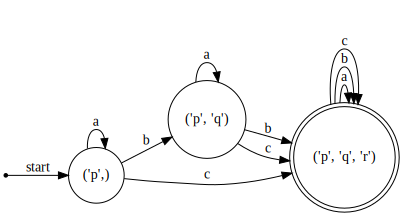

In [3]:
fsm_02 = fsm_01.asDFA()
display(Markdown(fstUtils.toMdTable(fsm_02)))
graphviz.Source(fstUtils.toDot(fsm_02))

| Input \ State | (('p',),) | (('p', 'q'),) | (('p', 'q', 'r'),) |
|:---:|:---:|:---:|:---:|
| a | (('p',),) | (('p', 'q'),) | (('p', 'q', 'r'),) |
| b | (('p', 'q'),) | (('p', 'q', 'r'),) | (('p', 'q', 'r'),) |
| c | (('p', 'q', 'r'),) | (('p', 'q', 'r'),) | (('p', 'q', 'r'),) |


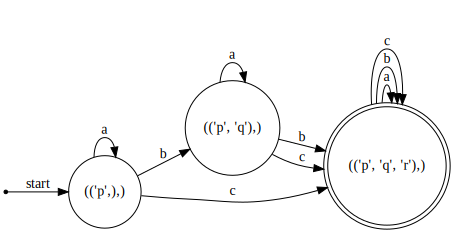

In [4]:
fsm_03 = fsm_02.asDFA()
display(Markdown(fstUtils.toMdTable(fsm_03)))
graphviz.Source(fstUtils.toDot(fsm_03))

isContains

[['S1', 'a', 'S3'], ['S2', 'a', 'S1'], ['S3', 'a', 'S2'], ['S1', 'b', 'S1'], ['S2', 'b', 'S2'], ['S3', 'b', 'S3'], ['S2', None, 'S3'], ['S1', 'a', 'S2'], ['S1', 'c', 'S4'], ['S3', None, 'S4'], ['S4', 'a', None]]
{('S1', 'a'): ['S3', 'S2'], ('S2', 'a'): 'S1', ('S3', 'a'): 'S2', ('S1', 'b'): 'S1', ('S2', 'b'): 'S2', ('S3', 'b'): 'S3', ('S2', None): 'S3', ('S1', 'c'): 'S4', ('S3', None): 'S4', ('S4', 'a'): None}


| Input \ State | S1 | S3 | S2 | S4 |
|:---:|:---:|:---:|:---:|:---:|
| a | S3, S2 | S2 | S1 | - |
| b | S1 | S3 | S2 | - |
| c | S4 | - | - | - |
| ε | - | S4 | S3 | - |


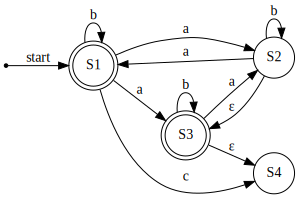

In [5]:
initState = 'S1'
transitionFunction = [
    ['S1','a','S3'], ['S2','a','S1'], ['S3','a','S2'],
    ['S1','b','S1'], ['S2','b','S2'], ['S3','b','S3'],
    ['S2',None,'S3'],
    ['S1','a','S2'],
    ['S1','c','S4'], ['S3',None,'S4'],
    ['S4','a',None],
    ]
finalStates = ['S1', 'S3']

fsm = fst( initState = initState,
        transitionFunction = transitionFunction,
        finalStates = finalStates,
    )

print( fsm.transitionFunction )
print( fsm.trFuncDict )
display(Markdown(fstUtils.toMdTable(fsm)))
# graphviz.Source(fsm.toDot())
graphviz.Source(fstUtils.toDot(fsm))

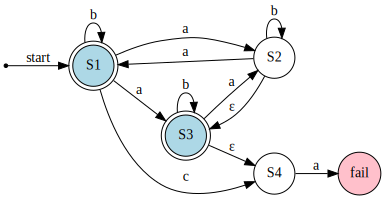

In [6]:
graphviz.Source(fstUtils.toDot(fsm, colorOfNoneState='pink', highlightStates=['S1','S3'], highlightStatesColor='lightblue'))

In [7]:
print( "getEpsilonClosure(\'S2\') => " + str(fsm.getEpsilonClosure( 'S2' )) )
print( "getEpsilonClosure(\'S3\') => " + str(fsm.getEpsilonClosure( 'S3' )) )
print( fsm.getEpsilonClosure( set( ['S4', 'S1'] ) ) )
print( "getNextStates S4, S1 & a => " + str(fsm.getNextStates( ['S4', 'S1'], 'a' )) )
print( "getNextStates S4, S1 & a => " + str(fsm.getNextStates( ['S4', 'S1'], 'a' )) )
print( "getNextStates S4 & a => " + str(fsm.getNextStates( 'S4', 'a' )) )
print( "getNextStates S2 & None => " + str(fsm.getNextStates( 'S2', None )) )
print( fsm.playFSM('ba', debug=1) )
print( fsm.playFSM('ca', debug=1) )

getEpsilonClosure('S2') => {'S2', 'S3', 'S4'}
getEpsilonClosure('S3') => {'S3', 'S4'}
{'S1', 'S4'}
getNextStates S4, S1 & a => {'S2', 'S3', None}
getNextStates S4, S1 & a => {'S2', 'S3', None}
getNextStates S4 & a => {None}
getNextStates S2 & None => {'S3'}
--> Start print debug info for playFSM():
-->   curent state(s): {'S1'}
-->   input signal: b
-->     next state(s): {'S1'}
-->       + ε-closure: {'S1'}
-->   curent state(s): {'S1'}
-->   input signal: a
-->     next state(s): {'S2', 'S3'}
-->       + ε-closure: {'S2', 'S3', 'S4'}
--> accepting state(s): {'S3'}
True
--> Start print debug info for playFSM():
-->   curent state(s): {'S1'}
-->   input signal: c
-->     next state(s): {'S4'}
-->       + ε-closure: {'S4'}
-->   curent state(s): {'S4'}
-->   input signal: a
-->     next state(s): {None}
-->       + ε-closure: {None}
--> last states: {None}, all accepting states: ['S1', 'S3']
False


In [8]:
print( fstUtils.toDot(fsm, colorOfNoneState='pink', highlightStates=['S1','S3'], highlightStatesColor='lightblue') )
print( "To be continued ..." )

digraph fst {
	rankdir=LR;node [shape=circle];
	"S1" [shape=doublecircle, style=filled, fillcolor=lightblue, label="S1"];
	start0 [shape=point]; start0 -> "S1" [label=start];
	node [shape=circle];
	"S3" [shape=doublecircle, style=filled, fillcolor=lightblue, label="S3"];
	"S2" [label="S2"];
	"S4" [label="S4"];
	"-" [style=filled, fillcolor=pink, label="fail"];
	node [style=filled, fillcolor=hotpink];
	"S1" -> "S3" [label="a"];
	"S2" -> "S1" [label="a"];
	"S3" -> "S2" [label="a"];
	"S1" -> "S1" [label="b"];
	"S2" -> "S2" [label="b"];
	"S3" -> "S3" [label="b"];
	"S2" -> "S3" [label="ε"];
	"S1" -> "S2" [label="a"];
	"S1" -> "S4" [label="c"];
	"S3" -> "S4" [label="ε"];
	"S4" -> "-" [label="a"];
}
To be continued ...
